<a href="https://colab.research.google.com/github/samugatu/AnaliseDeDesempenhoAcademico/blob/main/WineQuality_white.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qualidade de vinho (Branco)

Carregar os dados:

In [ ]:
import pandas
df = pandas.read_csv('winequality-white.csv', sep=';')


Vamos dar uma olhada no dataset:

In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Para fazer a analise exploratória dos dados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Vamos ver a distribuição dos dados através de um histograma:

<ipython-input-5-fe67b93c1616>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


Text(0, 0.5, 'Contagem')

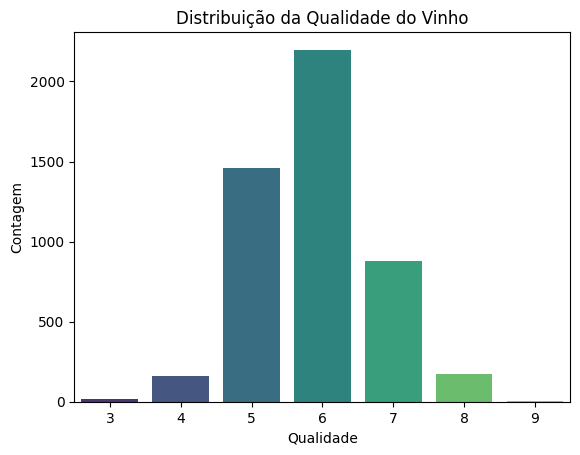

In [ ]:
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribuição da Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')

Assim observa-se a quantidade vinho em cada categoria de qualidade.


Vamos ver a correlção das variaveis com a variavel quality

<ipython-input-6-aa3b677920fe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_quality.values, y=correlations_with_quality.index, palette='coolwarm')


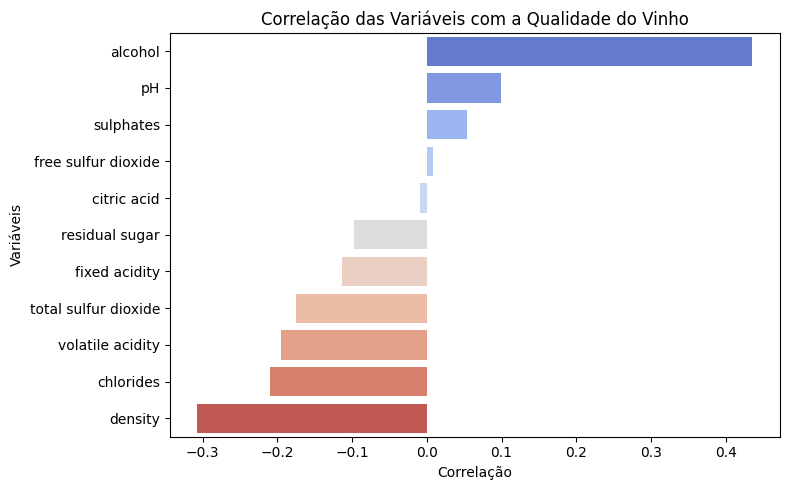

In [ ]:
correlations_with_quality = df.corr()['quality'].drop('quality').sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=correlations_with_quality.values, y=correlations_with_quality.index, palette='coolwarm')
plt.title('Correlação das Variáveis com a Qualidade do Vinho')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

Aqui podemos ver quais variaveis tem as maiores correlção com a qulidade. Podemos interpretar que os vinhos com **maior teor alcólico** tendem a ter **maior qualidade**. E as variáveis com correlção negativa nos diz uma tendência inversa, isto é vinhos com **maiores densidade**, tendem a ter **menos qualidade**.

Sempre bom lebram que correlção não é causalidade, isto é um vinho não é bom apenas por ter um teor alcólico alto, mas é uma caracteristica em comum dos vinhos de maior qualidade.

Agora vamos separar os dados de treino e teste em 80/20


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Vamos padronizar os dados:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Treinar o modelo de regressão linear:

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

Vamos agora checar o desempenho:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 0.57
R²: 0.27


O que podemos inferir destes valore?

O erro quadático médio (MSE)
Mede o erro médio ao quadro em relação as previsões do modelo e os valores reais de qualidade.
O valor de 0.57 dignica que está tendo um erro quadratico médio de 0.57 pntos, em uma escala de 0 a 10.
Resultado bom, porém não exclente considerando que na realidade varia de 3 até 9.



R^2 indica uma proporção do impacto das variaveis em relação ao modelo. Ou seja, o valor de 0,27 indica que 27% da variação da qualidade do vinho pode ser explicada pelas variáveis do dataset. O restante, ou seja, 73% não consegue ser explicada pelo dataset, ou seja ainda tem algumas informações que poderiam ajudar o modelo.